### Time series forecasting is an example of predictive modeling whereas time series analysis is a form of descriptive modeling.

### Stock market prices are known to be very volatile and noisy, and their accurate forecasting is a challenging problem. For a new investor general research which is associated with the stock or share market is not enough to make the decision. The common trend towards the stock market among the society is highly risky for investment so most of the people are not able to make decisions based on common trends. The seasonal variance and steady flow of any index will help both existing and new investors to understand and make a decision to invest in the share market.

### Stock markets are where individual and institutional investors come together to buy and sell shares in a public venue. Nowadays these exchanges exist as electronic marketplaces. That supply and demand help determine the price for each security or the levels at which stock market participants — investors and traders — are willing to buy or sell.

### A popular and widely used statistical method for time series forecasting is the ARIMA model. It is one of the most popular models to predict linear time series data. LSTM model is also developed to solve this kind of problem, especially when we use many features as our predictors in our model. Here we are going to use LSTM to forecast apple stock price based on the 5 years stock price movement.

### This is the dataset of stock prices at different time intervals of Apple USA

- symbol - Apple Stock
- close - Closing price
- high - Highest price of the day
- low - Lowest Price of the day
- open - Opening price of the day
- volume - Volume of stock traded
- adjClose - Closing stock price in relation to other stock attributes/actions
- adjHigh - Highest stock price in relation to other stock attributes/actions
- adjOpen - Opening Stock price in relation to other stock attributes/actions
- adjVolume - Trading volume in relation to other stock attributes/actions
- divCash - Cash dividend
- splitFactor - Stock split

# 1. Import Library and Dataset

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import concat
from math import sqrt
import numpy as np
from numpy import concatenate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM

In [2]:
df = pd.read_csv('../input/apple-stock-prices-20152020/AAPL.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


# 2. Data Cleaning

### We drop unnecessary Columns

In [3]:
df = df.drop(df.columns[[0,1]],axis=1)
df.drop(['splitFactor'],axis=1,inplace=True)

### We check and convert the data format of date feature

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1258 non-null   object 
 1   close      1258 non-null   float64
 2   high       1258 non-null   float64
 3   low        1258 non-null   float64
 4   open       1258 non-null   float64
 5   volume     1258 non-null   int64  
 6   adjClose   1258 non-null   float64
 7   adjHigh    1258 non-null   float64
 8   adjLow     1258 non-null   float64
 9   adjOpen    1258 non-null   float64
 10  adjVolume  1258 non-null   int64  
 11  divCash    1258 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 118.1+ KB


In [5]:
df.date = pd.to_datetime(df.date)

### We don't need the time information in our 'date' column. We only need the date of the stock trading.

In [6]:
df.date = df.date.dt.date

In [7]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash
0,2015-05-27,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0
1,2015-05-28,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0
2,2015-05-29,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0
3,2015-06-01,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0
4,2015-06-02,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0


### We check whether there is missing value in our data

In [8]:
df.isnull().sum()

date         0
close        0
high         0
low          0
open         0
volume       0
adjClose     0
adjHigh      0
adjLow       0
adjOpen      0
adjVolume    0
divCash      0
dtype: int64

### Our data is clean

# 3. Data Preprocessing - Feature Engineering

## 3.1. Make the date column as index of our data

In [9]:
df = df.set_index('date')

In [10]:
df.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash
date,,,,,,,,,,,
2015-05-27,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0
2015-05-28,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0
2015-05-29,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0
2015-06-01,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0
2015-06-02,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0


### We can see the stock price and trading volume movement over the years

<AxesSubplot:xlabel='date'>

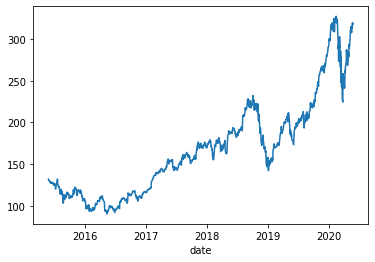

In [11]:
df.close.plot()

<AxesSubplot:xlabel='date'>

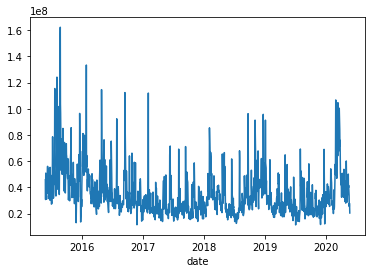

In [12]:
df.adjVolume.plot()

### We also can see the index movement of every stock feature

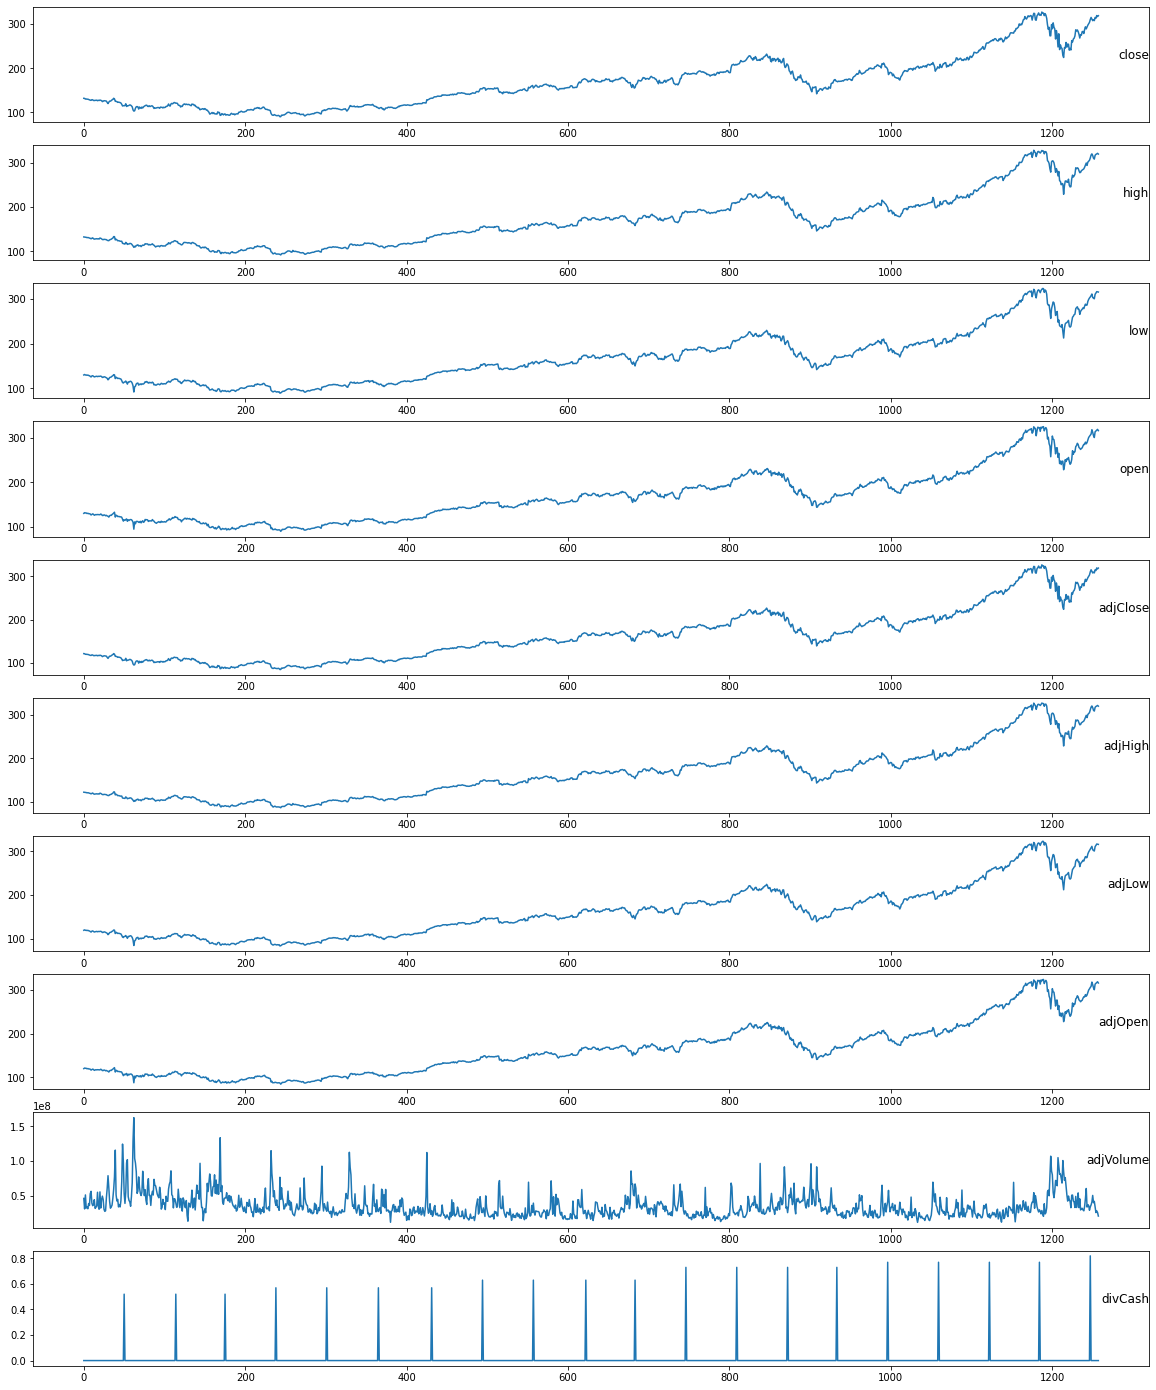

In [13]:
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10]
i = 1
# plot each column
plt.figure(figsize=(20,25))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

## 3.2. Converting Series data to supervised format.

### Here we will shift our data features 1 hour before the current index. Using these features, we are going to forecast the stock price for the next day (1 day after the current price). I got this function from machine learning mastery. It's very helpful.

In [14]:
# convert series to supervised
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [15]:
values = df.values
values = values.astype('float32')

In [16]:
values

array([[1.3204500e+02, 1.3225999e+02, 1.3005000e+02, ..., 1.2011136e+02,
        4.5833248e+07, 0.0000000e+00],
       [1.3178000e+02, 1.3195000e+02, 1.3110001e+02, ..., 1.2151208e+02,
        3.0733308e+07, 0.0000000e+00],
       [1.3028000e+02, 1.3145000e+02, 1.2989999e+02, ..., 1.2093152e+02,
        5.0884452e+07, 0.0000000e+00],
       ...,
       [3.1923001e+02, 3.1951999e+02, 3.1620001e+02, ..., 3.1667999e+02,
        2.7876216e+07, 0.0000000e+00],
       [3.1685001e+02, 3.2089001e+02, 3.1587000e+02, ..., 3.1866000e+02,
        2.5672212e+07, 0.0000000e+00],
       [3.1889001e+02, 3.1923001e+02, 3.1535001e+02, ..., 3.1576999e+02,
        2.0450754e+07, 0.0000000e+00]], dtype=float32)

## 3.3. Normalization

In [17]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
df_new = series_to_supervised(scaled, 1, 1)
print(df_new.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.176074   0.171860   0.173508   0.171857   0.228522   0.152158   
2   0.174956   0.170548   0.177997   0.178333   0.128419   0.151146   
3   0.168623   0.168431   0.172866   0.175649   0.262008   0.145419   
4   0.169699   0.168177   0.173508   0.175521   0.137564   0.146393   
5   0.167272   0.165065   0.170387   0.169812   0.147872   0.144198   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...   var2(t)   var3(t)  \
1   0.148554   0.149806   0.148290    0.228522  ...  0.170548  0.177997   
2   0.147365   0.153865   0.154145    0.128419  ...  0.168431  0.172866   
3   0.145446   0.149226   0.151718    0.262008  ...  0.168177  0.173508   
4   0.145216   0.149806   0.151603    0.137564  ...  0.165065  0.170387   
5   0.142396   0.146984   0.146441    0.147872  ...  0.166272  0.172866   

    var4(t)   var5(t)   var6(t)   var7(t)   var8(t)   var9(t)  var10(t)  \
1  0.178333  0.128419  0.151146  0.147365  0.15

### For the current price target (forecast price), we are only going to use closed price. So we can drop the rest of them.

In [18]:
df_new.drop(df_new.columns[[12,13,14,15,16,17,18,19,20,21]], axis=1, inplace=True)
print(df_new.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.176074   0.171860   0.173508   0.171857   0.228522   0.152158   
2   0.174956   0.170548   0.177997   0.178333   0.128419   0.151146   
3   0.168623   0.168431   0.172866   0.175649   0.262008   0.145419   
4   0.169699   0.168177   0.173508   0.175521   0.137564   0.146393   
5   0.167272   0.165065   0.170387   0.169812   0.147872   0.144198   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)   var1(t)  
1   0.148554   0.149806   0.148290    0.228522         0.0  0.174956  
2   0.147365   0.153865   0.154145    0.128419         0.0  0.168623  
3   0.145446   0.149226   0.151718    0.262008         0.0  0.169699  
4   0.145216   0.149806   0.151603    0.137564         0.0  0.167272  
5   0.142396   0.146984   0.146441    0.147872         0.0  0.167947  


In [19]:
df_new.shape

(1257, 12)

## 3.4. Data Splitting and Reshaping

### We are going to use the past 2 years of data as training set. We also reshape our input data (X) to 3 dimensions format because it's needed for our LSTM Model with shaping format namely [samples, timesteps, features].

In [20]:
# split into train and test sets
values = df_new.values
n_train_days = 365 * 2  #2 years
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(730, 1, 11) (730,) (527, 1, 11) (527,)


# 4. Forecasting Modelling Using LSTM Model

## 4.1. LSTM Network Design and Training

### We will define the LSTM with 50 neurons in the first and second hidden layer, 1 dropout layer to make sure model doesn't overfit, and 1 neuron in the output layer for predicting stock price. The input shape will be 1 time step with 11 features.

### We will use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.

2022-05-26 13:07:23.793620: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-05-26 13:07:24.383669: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
11/11 - 6s - loss: 0.1461 - val_loss: 0.4706
Epoch 2/50
11/11 - 0s - loss: 0.0977 - val_loss: 0.3671
Epoch 3/50
11/11 - 0s - loss: 0.0711 - val_loss: 0.2694
Epoch 4/50
11/11 - 0s - loss: 0.0639 - val_loss: 0.1848
Epoch 5/50
11/11 - 0s - loss: 0.0579 - val_loss: 0.1092
Epoch 6/50
11/11 - 0s - loss: 0.0539 - val_loss: 0.0689
Epoch 7/50
11/11 - 0s - loss: 0.0461 - val_loss: 0.0570
Epoch 8/50
11/11 - 0s - loss: 0.0301 - val_loss: 0.0215
Epoch 9/50
11/11 - 0s - loss: 0.0220 - val_loss: 0.0482
Epoch 10/50
11/11 - 0s - loss: 0.0168 - val_loss: 0.0760
Epoch 11/50
11/11 - 0s - loss: 0.0165 - val_loss: 0.0863
Epoch 12/50
11/11 - 0s - loss: 0.0159 - val_loss: 0.0804
Epoch 13/50
11/11 - 0s - loss: 0.0150 - val_loss: 0.0560
Epoch 14/50
11/11 - 0s - loss: 0.0166 - val_loss: 0.0620
Epoch 15/50
11/11 - 0s - loss: 0.0160 - val_loss: 0.0479
Epoch 16/50
11/11 - 0s - loss: 0.0150 - val_loss: 0.0618
Epoch 17/50
11/11 - 0s - loss: 0.0146 - val_loss: 0.0541
Epoch 18/50
11/11 - 0s - loss: 0.0155 - 

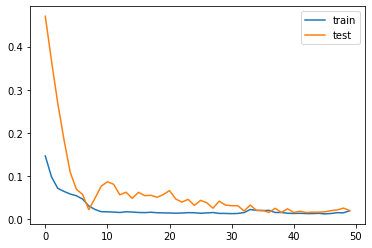

In [21]:
# design network
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### We got a quite small loss in training sample

## 4.2. Model Evaluation

In [22]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6.564


### The RMSE is quite small. Our forecasting model has a good performance while forecasting test data.

## 4.3. Actual and Forecasted Price Comparasion

In [23]:
result_comp = pd.DataFrame(list(zip(inv_y, inv_yhat)),
               columns =['Close_Price_Real', 'Close_Price_Forecast'])

In [24]:
result_comp.head()

,Close_Price_Real,Close_Price_Forecast
0,165.720001,176.462631
1,165.240005,172.190506
2,162.940002,168.481400
3,163.649994,166.748398
4,164.220001,165.969131


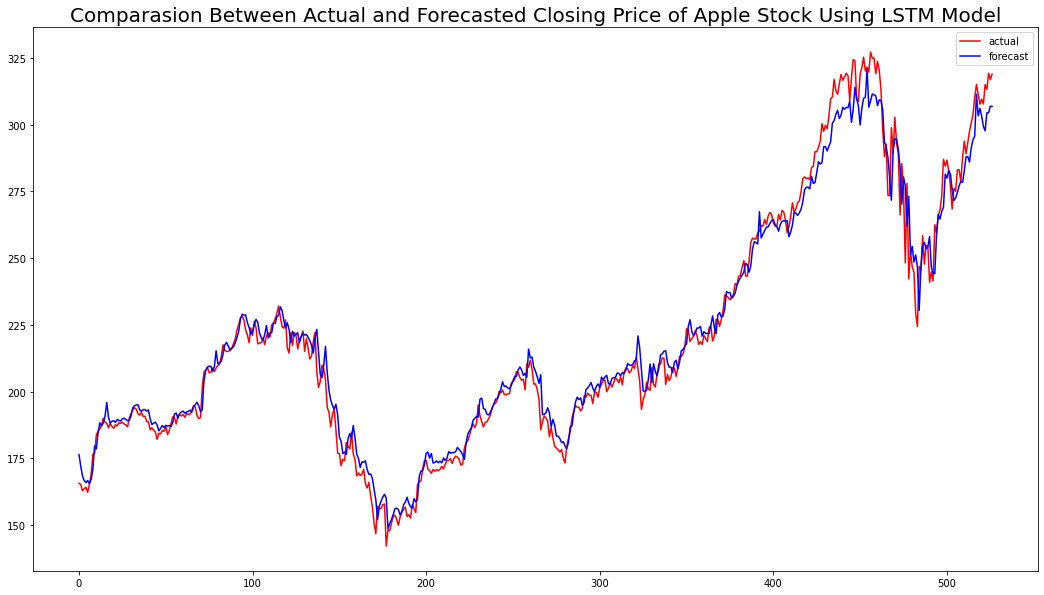

In [25]:
plt.figure(figsize=(18,10))
plt.plot(result_comp['Close_Price_Real'],label='actual',color='red')
plt.plot(result_comp['Close_Price_Forecast'],label='forecast',color='blue')
plt.title('Comparasion Between Actual and Forecasted Closing Price of Apple Stock Using LSTM Model',fontsize=20)
plt.legend()

### The actual and forecasted or predicted price are quite simillar. We have proofed that LSTM model is able to be developed for stock price forecasting and it has capability of forecasting 1 step ahead data based on the past data (1 day before).

In [26]:
model.save('_Stock_Price_Model_LSTM.h5')
print("Saved")

Saved
